# **FINAL PROJECT - CÂU 1**
- Họ và tên: Trần Anh khoa
- Lớp: 23CTT2
- Mã số sinh viên: 23120135
- Học phần: Toán ứng dụng và thống kê

## **(a) Mô tả đầu vào (input) và đầu ra (output) của mô hình cần được xây dựng**
- Đầu vào (input): age, annual_income, purchase_amount, purchase_frequency
- Đầu ra (output): loyalty_score


## **(b) Sử dụng thư viện matplotlib, để xem mối liên hệ giữa đặc trưng thứ i và đầu ra của tập dữ liệu, vẽ biểu đồ thể hiện các điểm dữ liệu cho từng cặp ($X_i$, $Y$), trong đó $X_i$ là đặc trưng thứ i của tập dữ liệu, và Y là đầu ra  của tập dữ liệu**

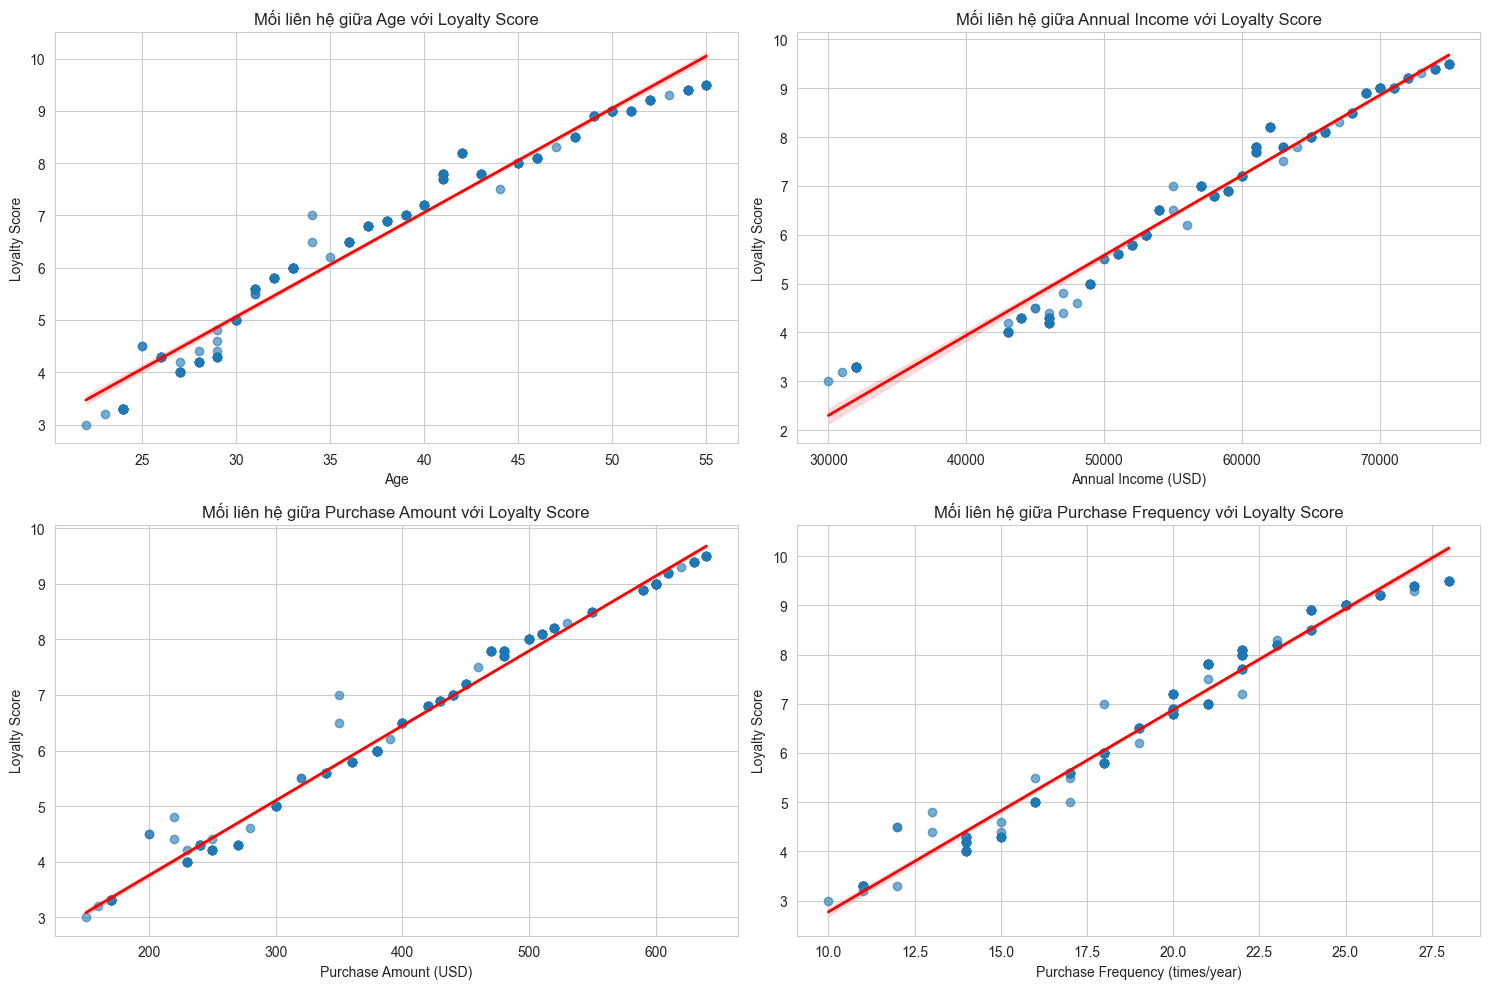

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv('customer_purchase_behaviors.csv')

# Thiết lập kích thước figure và style
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# Tạo 2x2 subplots với đường hồi quy
# Age với Loyalty Score
plt.subplot(2, 2, 1)
sns.regplot(x='age', y='loyalty_score', data=df, scatter_kws={'alpha':0.6}, 
            line_kws={'color':'red', 'linewidth':2})
plt.title('Mối liên hệ giữa Age với Loyalty Score')
plt.xlabel('Age')
plt.ylabel('Loyalty Score')

# Annual Income với Loyalty Score
plt.subplot(2, 2, 2)
sns.regplot(x='annual_income', y='loyalty_score', data=df, scatter_kws={'alpha':0.6}, 
            line_kws={'color':'red', 'linewidth':2})
plt.title('Mối liên hệ giữa Annual Income với Loyalty Score')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Loyalty Score')

# Purchase Amount với Loyalty Score
plt.subplot(2, 2, 3)
sns.regplot(x='purchase_amount', y='loyalty_score', data=df, scatter_kws={'alpha':0.6}, 
            line_kws={'color':'red', 'linewidth':2})
plt.title('Mối liên hệ giữa Purchase Amount với Loyalty Score')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Loyalty Score')

# Purchase Frequency với Loyalty Score
plt.subplot(2, 2, 4)
sns.regplot(x='purchase_frequency', y='loyalty_score', data=df, scatter_kws={'alpha':0.6}, 
            line_kws={'color':'red', 'linewidth':2})
plt.title('Mối liên hệ giữa Purchase Frequency với Loyalty Score')
plt.xlabel('Purchase Frequency (times/year)')
plt.ylabel('Loyalty Score')

# Điều chỉnh layout để tránh chồng chéo
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


## **(c) Xây dựng mô hình hồi quy tuyến tính dạng đơn giản nhất, $y = w_0 + w_1 \times x_1 + ... + w_n \times x_n$ với n là số lượng đặc trưng trong tập dữ liệu, trong đó sử dụng toàn bộ tất cả các biến đầu vào được mô tả ở câu (a)**

Với yêu cầu xây dựng mô hình hồi quy tuyến tính dạng đơn giản nhất $y = w_0 + w_1x_1 + ... + w_nx_n$, trong đó sử dụng toàn bộ các biến đầu vào được mô tả ở câu (a), ta có mô hình như sau:

$$y = w_0 + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4$$

Trong đó:
- $w_0$ là hệ số chặn (intercept)
- $w_1, w_2, w_3, w_4$ lần lượt là các hệ số hồi quy của các biến đầu vào
- $x_1, x_2, x_3, x_4$ lần lượt là các biến đặc trưng: $\text{age}$, $\text{annual\_income}$, $\text{purchase\_amount}$, $\text{purchase\_frequency}$
- $y$ là biến đầu ra loyalty_score

In [2]:
# ========================= CÁC HÀM PHỤ TRỢ =========================
# Hàm tính tích hai ma trận
def multiply_matrix(A_list, B_list):
    result_list = [[0 for _ in range(len(B_list[0]))] for _ in range(len(A_list))]

    m_row_A = len(A_list)
    n_col_B = len(B_list[0])
    for i_row in range(m_row_A):
        for i_col in range(n_col_B):
            total = 0
            for i,a in enumerate(A_list[i_row]): 
                total += a*B_list[i][i_col]
            result_list[i_row][i_col] = total

    return result_list
    
# Hàm tìm ma trận khả nghịch và tìm ma trận nghịch đảo
def find_inverse(matrix):
    size = len(matrix)

    # Kiểm tra ma trận đầu vào có vuông không
    if not all(len(row) == size for row in matrix):
        raise ValueError("Đầu vào phải là ma trận vuông")

    # Tạo ma trận mở rộng [matrix | I]
    augmented = []
    for row_index in range(size):
        row = []
        
        for col_index in range(size):
            row.append(matrix[row_index][col_index])
            
        for col_index in range(size):
            if row_index == col_index:
                row.append(1)
            else:
                row.append(0)
        augmented.append(row)

    # Khử Gauss–Jordan
    for pivot_index in range(size):
        # Nếu phần tử chéo chính bằng 0 thì ta đổi dòng
        if augmented[pivot_index][pivot_index] == 0:
            found = False
            for swap_row in range(pivot_index + 1, size):
                if augmented[swap_row][pivot_index] != 0:
                    augmented[pivot_index], augmented[swap_row] = augmented[swap_row], augmented[pivot_index]
                    found = True
                    break
            if not found:
                print("Ma trận không khả nghịch")
                return None  

        # Biến phần tử chéo chính thành 1
        pivot_value = augmented[pivot_index][pivot_index]
        for col in range(2 * size):
            augmented[pivot_index][col] /= pivot_value

        # Khử các phần tử khác trong cột để tạo giá trị 0
        for row_index in range(size):
            if row_index != pivot_index:
                factor = augmented[row_index][pivot_index]
                for col in range(2 * size):
                    augmented[row_index][col] -= factor * augmented[pivot_index][col]

    # Phần bên phải của ma trận lúc này là ma trận nghịch đảo cần tìm
    inverse = []
    for row_index in range(size):
        inverse_row = []
        for col_index in range(size, 2 * size):
            inverse_row.append(augmented[row_index][col_index])
        inverse.append(inverse_row)

    return inverse
    
# Hàm tìm ma trận chuyển vị
def transpose_matrix(A):
    num_rows = len(A)
    num_cols = len(A[0])

    transposed_A = []
    for col in range(num_cols):
        new_row = []
        for row in range(num_rows):
            new_row.append(A[row][col])
        transposed_A.append(new_row)

    return transposed_A
    
# Hàm thêm cột 1 vào ma trận để tính toán hệ số chặn
def add_intercept_column_to_A(A):
    num_rows = len(A)
    result = []

    for row in A:
        new_row = [1] + row  # Thêm số 1 vào đầu mỗi hàng
        result.append(new_row)

    return result
    
# Hàm chia dữ liệu thành k phần cho cross-validation
def split_k_folds(X, y, k):
    # Gộp X và y lại để tiện trộn đồng thời
    data = list(zip(X, y))
    n = len(data)

    # Chia kích thước các fold gần bằng nhau
    fold_sizes = [n // k] * k
    for i in range(n % k):
        fold_sizes[i] += 1

    folds = []
    current = 0

    for fold_size in fold_sizes:
        test_data = data[current:current + fold_size]
        train_data = data[:current] + data[current + fold_size:]

        # Tách lại X và y cho train/test
        X_train = [x for x, _ in train_data]
        y_train = [y for _, y in train_data]
        X_test = [x for x, _ in test_data]
        y_test = [y for _, y in test_data]

        folds.append((X_train, y_train, X_test, y_test))
        current += fold_size

    return folds


# Hàm tính MSE 
def calculate_mean_squared_error(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError("Hai danh sách phải có cùng độ dài.")

    n = len(y_true)
    total_error = 0

    for i in range(n):
        error = y_true[i] - y_pred[i]
        total_error += error ** 2

    mse = total_error / n
    return mse

# Hàm đọc dữ liệu cần thiết từ file CSV
def read_customer_csv(filename):
    with open(filename, "r") as f:
        lines = f.readlines()

    # Bỏ dòng tiêu đề
    header = lines[0].strip().split(",")
    data = []

    for line in lines[1:]:
        parts = line.strip().split(",")
        
        # Loại bỏ cột user_id (cột 0) và region (cột 5)
        # Chỉ giữ lại age, annual_income, purchase_amount, loyalty_score, purchase_frequency
        filtered_parts = [parts[1], parts[2], parts[3], parts[4], parts[6]]
        
        # Chuyển tất cả thành float
        row = [float(value) for value in filtered_parts]
        data.append(row)

    # Lấy loyalty_score (cột thứ 3 sau khi lọc) là đầu ra y
    y = [row[3] for row in data]
    
    # Lấy các cột còn lại là đặc trưng đầu vào A: age, annual_income, purchase_amount, purchase_frequency
    # (bỏ loyalty_score khỏi A)
    A = [[row[0], row[1], row[2], row[4]] for row in data]

    return A, y

In [3]:
# ========================= HÀM CHÍNH =========================

# Hàm huấn luyện mô hình hồi quy tuyến tính sử dụng k-fold cross-validation
def linear_regression(A, y, k):
    # Thêm cột 1 vào ma trận đặc trưng để tính hệ số chặn
    A = add_intercept_column_to_A(A)

    # Chia dữ liệu thành k folds
    folds = split_k_folds(A, y, k)

    mse_list = []

    best_w = None
    best_mse = float("inf")
    best_model = -1

    fold_results = []  # Danh sách lưu kết quả để trực quan hóa

    for fold_index, (A_train, y_train, A_test, y_test) in enumerate(folds):
        # Tính w = (A^T * A)^(-1) * A^T * y
        A_train_T = transpose_matrix(A_train)
        ATA = multiply_matrix(A_train_T, A_train)
        ATy = multiply_matrix(A_train_T, [[val] for val in y_train]) 

        ATA_inv = find_inverse(ATA)
        if ATA_inv is None:
            print(f"Fold {fold_index + 1}: Ma trận không khả nghịch, bỏ qua fold này.")
            continue  # Bỏ qua fold không khả nghịch

        w_matrix = multiply_matrix(ATA_inv, ATy)  

        print(f"\nFold {fold_index + 1}")
        w_str = ", ".join([f"w{i} = {w[0]:.6f}" for i, w in enumerate(w_matrix)])
        print(f"Hệ số hồi quy: w = [{w_str}]")


        # Dự đoán y_pred = A_test * w
        y_pred_matrix = multiply_matrix(A_test, w_matrix)  
        y_pred = [row[0] for row in y_pred_matrix]  

        mse = calculate_mean_squared_error(y_test, y_pred)
        print(f"Fold {fold_index + 1} có MSE = {mse:.6f}")
        print("-" * 40)
        mse_list.append(mse)

        # Lưu kết quả để visualize
        fold_results.append({
            "fold": fold_index + 1,
            "mse": mse,
            "y_test": y_test,
            "y_pred": y_pred
        })

        # Tìm ra mô hình tốt nhất
        if mse < best_mse:
            best_mse = mse
            best_w = [row[0] for row in w_matrix]
            best_model = fold_index + 1

    # In mô hình tốt nhất
    if best_w is not None:
        print(f"\nMô hình tốt nhất là ở Fold {best_model} (vì cho giá trị MSE bé nhất với MSE = {best_mse:.6f})")
        w_str = ", ".join([f"w{i} = {w:.6f}" for i, w in enumerate(best_w)])
        print(f"Hệ số w tốt nhất: [{w_str}]")

    
    # Trả về kết quả ở từng fold và mô hình tốt nhất
    return fold_results, best_model

In [4]:
if __name__ == "__main__":
    
    # Lấy dữ liệu đặc trưng và nhãn từ dataframe df, chỉ lấy các cột số
    A, y = read_customer_csv("customer_purchase_behaviors.csv")
    
    # Chia dữ liệu thành k fold và huấn luyện mô hình hồi quy tuyến tính
    fold_results, best_model = linear_regression(A, y, k=5)



Fold 1
Hệ số hồi quy: w = [w0 = 1.134645, w1 = -0.004760, w2 = 0.000011, w3 = 0.015143, w4 = -0.063244]
Fold 1 có MSE = 0.105376
----------------------------------------

Fold 2
Hệ số hồi quy: w = [w0 = 0.441923, w1 = 0.007583, w2 = 0.000038, w3 = 0.011685, w4 = -0.055313]
Fold 2 có MSE = 0.031158
----------------------------------------

Fold 3
Hệ số hồi quy: w = [w0 = 0.472991, w1 = 0.005144, w2 = 0.000039, w3 = 0.011982, w4 = -0.062173]
Fold 3 có MSE = 0.026095
----------------------------------------

Fold 4
Hệ số hồi quy: w = [w0 = 0.434240, w1 = 0.007709, w2 = 0.000039, w3 = 0.011657, w4 = -0.056120]
Fold 4 có MSE = 0.032228
----------------------------------------

Fold 5
Hệ số hồi quy: w = [w0 = 0.472563, w1 = 0.005705, w2 = 0.000038, w3 = 0.011912, w4 = -0.058325]
Fold 5 có MSE = 0.025862
----------------------------------------

Mô hình tốt nhất là ở Fold 5 (vì cho giá trị MSE bé nhất với MSE = 0.025862)
Hệ số w tốt nhất: [w0 = 0.472563, w1 = 0.005705, w2 = 0.000038, w3 = 0.

**Kết luận:**  
Mô hình hồi quy tuyến tính dự đoán điểm thân thiết của khách hàng được xây dựng theo yêu cầu (c) có dạng:

$$y = 0.472563 + 0.005705 \times x_1 +0.000038 \times x_2 + 0.011912 \times x_3 -0.058325 \times x_4$$

## **(d) Xét mô hình hồi quy tuyến tính $y = w_0 + w_1 \times x_1$ chỉ sử dụng 1 đặc trưng duy nhất, hãy tìm đặc trưng mà mô hình hồi quy tuyến tính thể hiện tốt nhất**

### Mô hình hồi quy tuyến tính được xây dựng sẽ có dạng
$$
 y = w_0 + w_1 x_1
$$

### Ý tưởng và cách tiếp cận:

Ta sẽ lần lượt xây dựng 4 mô hình hồi quy tuyến tính, mỗi mô hình chỉ sử dụng một đặc trưng đầu vào trong số 4 đặc trưng được mô tả ở câu (c). 
Cụ thể, với mỗi đặc trưng:

- Mô hình sẽ được huấn luyện trên toàn bộ tập dữ liệu để tìm ra các hệ số hồi quy tối ưu $w_0$ và $w_1$.
- Sử dụng công thức $w = (X^T X)^{-1} X^T y$ để tính toán trực tiếp các hệ số.
- MSE được tính trên chính tập dữ liệu huấn luyện để đánh giá mức độ khớp của mô hình với dữ liệu.
- So sánh MSE giữa các mô hình để xác định đặc trưng có khả năng dự đoán tốt nhất.

Đặc trưng nào cho mô hình có MSE thấp nhất sẽ được chọn là đặc trưng tốt nhất cho việc dự đoán loyalty_score.

In [5]:
# Hàm xây dựng mô hình hồi quy tuyến tính đơn giản với một đặc trưng
def simple_linear_regression(A, y):
    # Thêm cột 1 để tính hệ số chặn
    A = add_intercept_column_to_A(A)
    
    A_T = transpose_matrix(A)
    ATA = multiply_matrix(A_T, A)
    ATy = multiply_matrix(A_T, [[val] for val in y])
    
    # Tìm ma trận nghịch đảo
    ATA_inv = find_inverse(ATA)
    if ATA_inv is None:
        print("Ma trận không khả nghịch, không thể tính hệ số hồi quy")
        return None
        
    # Tính hệ số hồi quy
    w_matrix = multiply_matrix(ATA_inv, ATy)
    w = [row[0] for row in w_matrix]
    
    # Dự đoán giá trị trên tập huấn luyện
    y_pred_matrix = multiply_matrix(A, w_matrix)
    y_pred = [row[0] for row in y_pred_matrix]
    
    # Tính MSE
    mse = calculate_mean_squared_error(y, y_pred)
    
    return w, mse

# Hàm đánh giá từng đặc trưng đơn lẻ
def evaluate_single_features(A, y):
    num_features = len(A[0])
    feature_names = ["age", "annual_income", "purchase_amount", "purchase_frequency"]
    results = []
    
    # Đánh giá từng đặc trưng
    for i in range(num_features):
        # Trích xuất đặc trưng thứ i
        A_single = [[row[i]] for row in A]
        
        # Huấn luyện mô hình với đặc trưng này
        w, mse = simple_linear_regression(A_single, y)
        
        if w is not None:
            # In thông tin mô hình cho đặc trưng này
            print(f"\nMô hình cho đặc trưng {feature_names[i]} (x_{i+1}):")
            print(f"  Phương trình: loyalty_score = {w[0]:.6f} + {w[1]:.6f} × {feature_names[i]}")
            print(f"  MSE: {mse:.6f}")
            
            results.append({
                "feature_index": i,
                "feature_name": feature_names[i],
                "w": w,
                "mse": mse
            })
    
    # Tìm đặc trưng tốt nhất (MSE thấp nhất)
    if results:
        best_feature = min(results, key=lambda x: x["mse"])
        print("\n" + "="*50)
        print(f"Đặc trưng tốt nhất là: {best_feature['feature_name']} (x_{best_feature['feature_index']+1})")
        print(f"Mô hình hồi quy tuyến tính tốt nhất: loyalty_score = {best_feature['w'][0]:.6f} + {best_feature['w'][1]:.6f} × {best_feature['feature_name']}")
        print(f"MSE: {best_feature['mse']:.6f}")
        
        return best_feature["feature_index"], best_feature["w"]
    
    return None, None

In [6]:
if __name__ == "__main__":

    # Lấy dữ liệu đặc trưng và nhãn từ file CSV
    A, y = read_customer_csv("customer_purchase_behaviors.csv")
    
    # Thực hiện đánh giá từng đặc trưng và in kết quả
    best_feature_index, best_w = evaluate_single_features(A, y)


Mô hình cho đặc trưng age (x_1):
  Phương trình: loyalty_score = -0.917717 + 0.199393 × age
  MSE: 0.129281

Mô hình cho đặc trưng annual_income (x_2):
  Phương trình: loyalty_score = -2.616160 + 0.000164 × annual_income
  MSE: 0.111517

Mô hình cho đặc trưng purchase_amount (x_3):
  Phương trình: loyalty_score = 1.056530 + 0.013480 × purchase_amount
  MSE: 0.041914

Mô hình cho đặc trưng purchase_frequency (x_4):
  Phương trình: loyalty_score = -1.338628 + 0.410780 × purchase_frequency
  MSE: 0.092838

Đặc trưng tốt nhất là: purchase_amount (x_3)
Mô hình hồi quy tuyến tính tốt nhất: loyalty_score = 1.056530 + 0.013480 × purchase_amount
MSE: 0.041914


**Kết luận:**  
Mô hình hồi quy tuyến tính dự đoán điểm thân thiết của khách hàng được xây dựng theo yêu cầu (d) có dạng:

$$y = 1.056530 + 0.013480 \times x_3$$

## **(e) Thiết kế một mô hình hồi quy tuyến tính khác với những mô hình trên mà cho kết quả tốt nhất. Lưu ý, ta chỉ cần tính chất “tuyến tính” cho các tham số $w_i$, còn $x_i$ có thể ở bất kì dạng nào. Do đó, các bạn có thể thay đổi $x_i$ tuỳ ý, ví dụ $x_1$ thành $x_1^2$ hay $\sqrt x_1$, miễn là mô hình có thể đạt được kết quả tốt hơn những mô hình ở câu (c) và (d)**

Ở câu này, tôi đề xuất mô hình như sau:

$$y = w_0 + w_1 \times \log(x_1) + w_2 \times \sqrt{x_2} + w_3 \times x_3 + w_4 \times x_4^2 + w_5 \times \frac{x_2}{x_3} + w_6 \times (x_1 \times x_4)$$

**Trong đó**
- $w_0$ là hệ số chặn (intercept)
- $w_1, w_2, w_3, w_4, w_5, w_6$ lần lượt là các hệ số hồi quy của các biến đầu vào
- $x_1, x_2, x_3, x_4$ lần lượt là các biến đặc trưng: $\text{age}$, $\text{annual\_income}$, $\text{purchase\_amount}$, $\text{purchase\_frequency}$
- $y$ là biến đầu ra loyalty_score

**1. Biến đổi logarit cho tuổi: $\log(x_1)$**
- Giảm ảnh hưởng của tuổi đến mô hình (từ câu b ta có thể thấy được đặc trưng age có độ phân tán dữ liệu xung quanh đường hồi quy lớn hơn nhiều so với các đặc trưng khác)

**2. Căn bậc hai thu nhập: $\sqrt{x_2}$**
- Giảm ảnh hưởng của outlier thu nhập cao

**3. Giữ nguyên: $x_3$**
- Có tương quan tuyến tính tốt từ câu (d)

**4. Bình phương tần suất: $x_4^2$**
- Tăng cường ảnh hưởng của tần suất mua hàng

**5. Tỷ lệ thu nhập/chi tiêu: $\frac{x_2}{x_3}$**
- Phản ánh khả năng tài chính và thói quen chi tiêu

**6. Tương tác tuổi-tần suất: $x_1 \times x_4$**
- Tạo sự tương tác giữa tuổi và tần suất mua hàng

In [7]:
# Hàm chuyển đổi đặc trưng để cải thiện mô hình hồi quy tuyến tính
def transform_features_advanced(A):

    import math
    
    transformed_A = []
    
    for row in A:
        age = row[0]
        annual_income = row[1]
        purchase_amount = row[2]
        purchase_frequency = row[3]
        
        new_row = [
            math.log(age + 1), #tránh việc tính log số âm khi dữ liệu lỗi            
            math.sqrt(annual_income),           
            purchase_amount,                    
            purchase_frequency ** 2,             
            annual_income / (purchase_amount + 0.0000001), #tránh việc chia cho 0
            age * purchase_frequency           
        ]
        
        transformed_A.append(new_row)
    
    return transformed_A

In [8]:
if __name__ == "__main__":

    # Lấy dữ liệu đặc trưng và nhãn từ file CSV
    A, y = read_customer_csv("customer_purchase_behaviors.csv")

    # Chuyển đổi đặc trưng để cải thiện mô hình
    A_transformed = transform_features_advanced(A)
    
    # Huấn luyện mô hình hồi quy tuyến tính với dữ liệu đã chuyển đổi
    fold_results, best_model = linear_regression(A_transformed, y, k=5)


Fold 1
Hệ số hồi quy: w = [w0 = -14.158032, w1 = 5.275238, w2 = -0.013970, w3 = 0.013071, w4 = 0.004008, w5 = 0.006705, w6 = -0.003940]
Fold 1 có MSE = 0.090045
----------------------------------------

Fold 2
Hệ số hồi quy: w = [w0 = -21.161021, w1 = 6.717324, w2 = -0.018377, w3 = 0.016603, w4 = 0.007227, w5 = 0.021871, w6 = -0.006650]
Fold 2 có MSE = 0.017786
----------------------------------------

Fold 3
Hệ số hồi quy: w = [w0 = -21.226209, w1 = 6.709785, w2 = -0.018240, w3 = 0.016706, w4 = 0.007314, w5 = 0.022092, w6 = -0.006713]
Fold 3 có MSE = 0.015483
----------------------------------------

Fold 4
Hệ số hồi quy: w = [w0 = -21.031647, w1 = 6.670618, w2 = -0.017979, w3 = 0.016465, w4 = 0.007248, w5 = 0.021676, w6 = -0.006618]
Fold 4 có MSE = 0.017875
----------------------------------------

Fold 5
Hệ số hồi quy: w = [w0 = -21.377984, w1 = 6.769175, w2 = -0.018607, w3 = 0.016737, w4 = 0.007312, w5 = 0.022256, w6 = -0.006732]
Fold 5 có MSE = 0.015510
--------------------------

**Kết luận:**  
Mô hình hồi quy tuyến tính dự đoán điểm thân thiết của khách hàng được xây dựng cho câu (e) có dạng:

$y = -21.226209 + 6.709785 \times \log(x_1) - 0.018240 \times \sqrt{x_2} + 0.016706 \times x_3 + 0.007314 \times x_4^2 + 0.022092 \times \frac{x_2}{x_3} - 0.006713 \times (x_1 \times x_4)$